In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataframe = pd.read_csv('Final_Processed_Dataset.csv')

Distribution of Recipe Categories

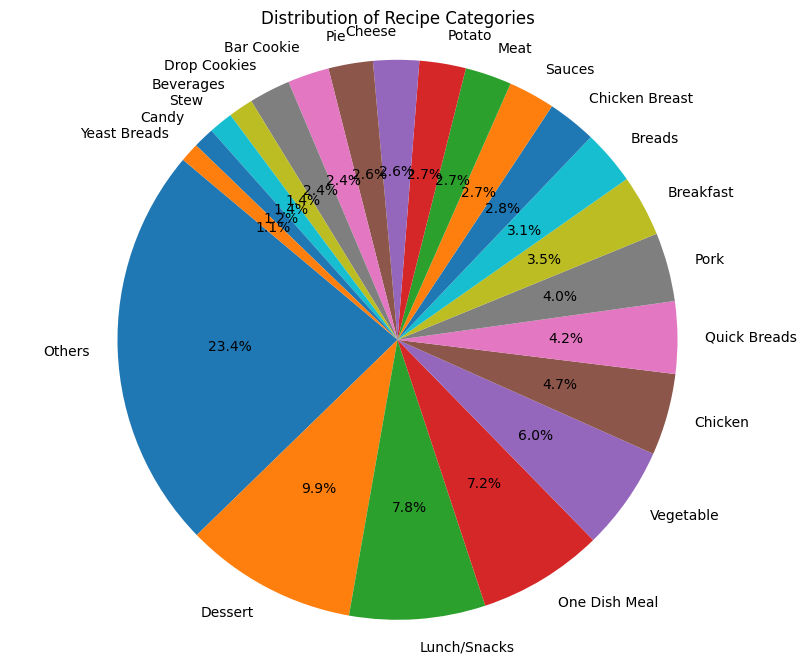

In [2]:
category_counts = dataframe['RecipeCategory'].value_counts()

threshold = len(dataframe) * 0.01
rare_categories = category_counts[category_counts < threshold].index

dataframe['RecipeCategory'] = dataframe['RecipeCategory'].apply(lambda x: 'Others' if x in rare_categories else x)

category_counts = dataframe['RecipeCategory'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recipe Categories')
plt.axis('equal')
plt.show()


Distribution of All Ratings

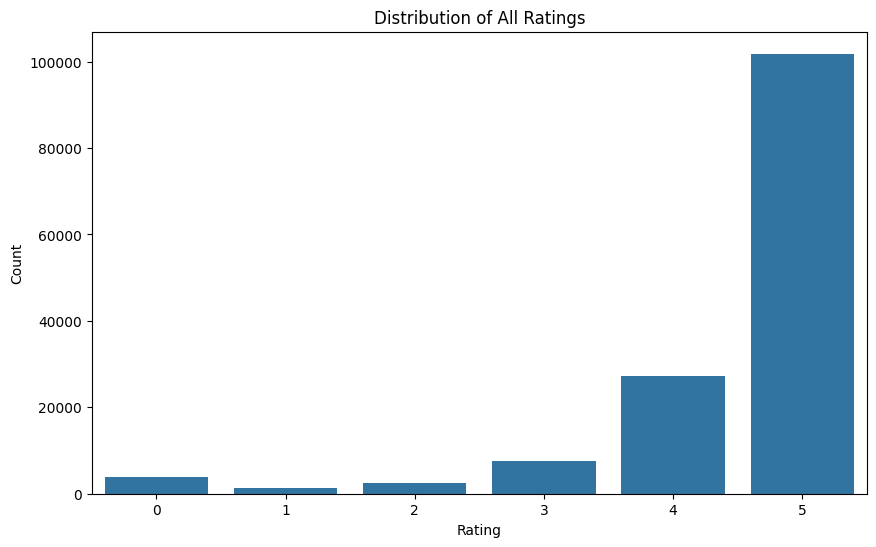

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=dataframe)
plt.title('Distribution of All Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Monthly Recipe Publication

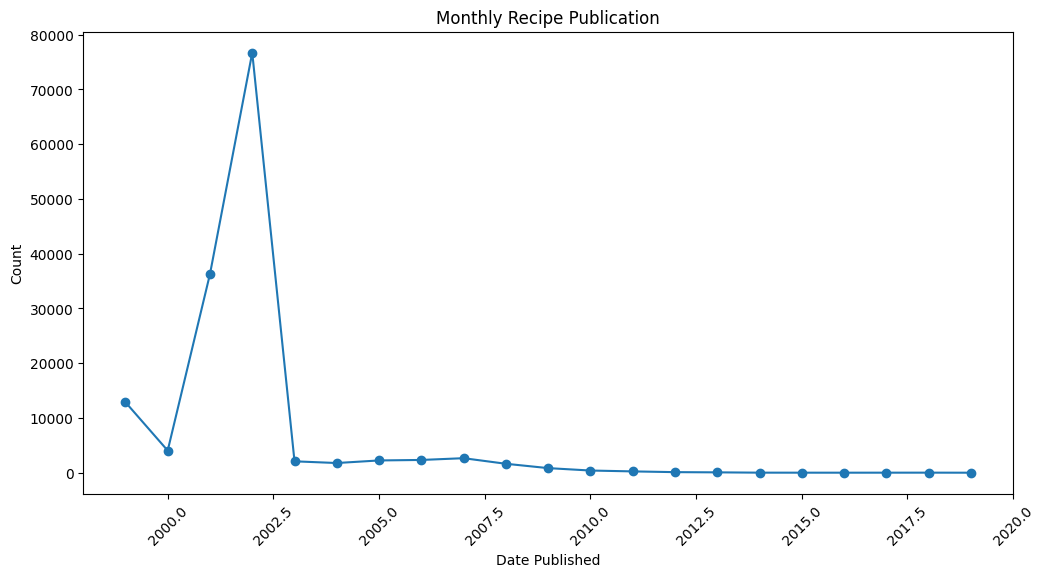

In [4]:
plt.figure(figsize=(12, 6))
monthly_publication = dataframe['DatePublished'].value_counts().sort_index()
monthly_publication.plot(kind='line', marker='o')
plt.title('Monthly Recipe Publication')
plt.xlabel('Date Published')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Calories

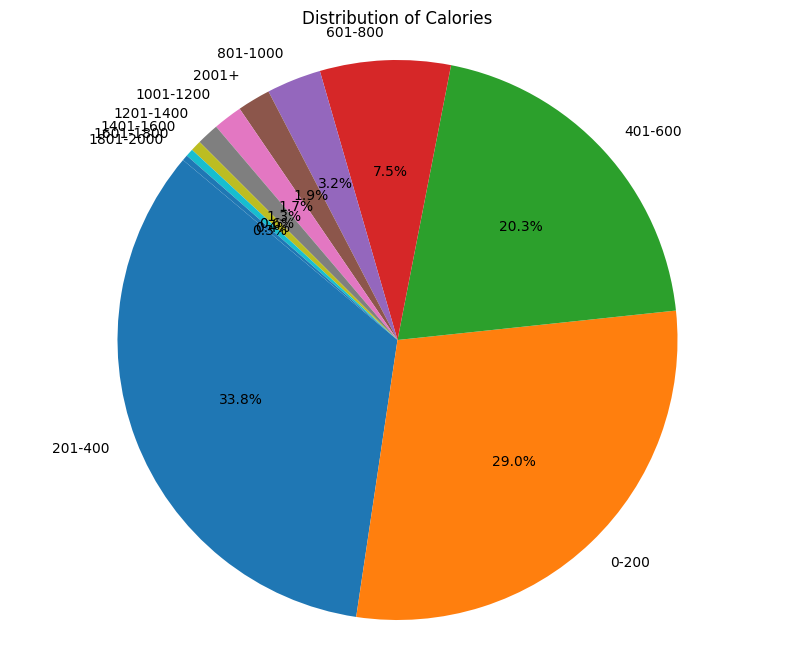

In [5]:
calorie_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, float('inf')]
calorie_labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', 
                  '1401-1600', '1601-1800', '1801-2000', '2001+']

dataframe['CalorieRange'] = pd.cut(dataframe['Calories'], bins=calorie_bins, labels=calorie_labels, right=False)

calorie_counts = dataframe['CalorieRange'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(calorie_counts, labels=calorie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Calories')
plt.axis('equal') 
plt.show()


Top 10 Recipes by Review Count

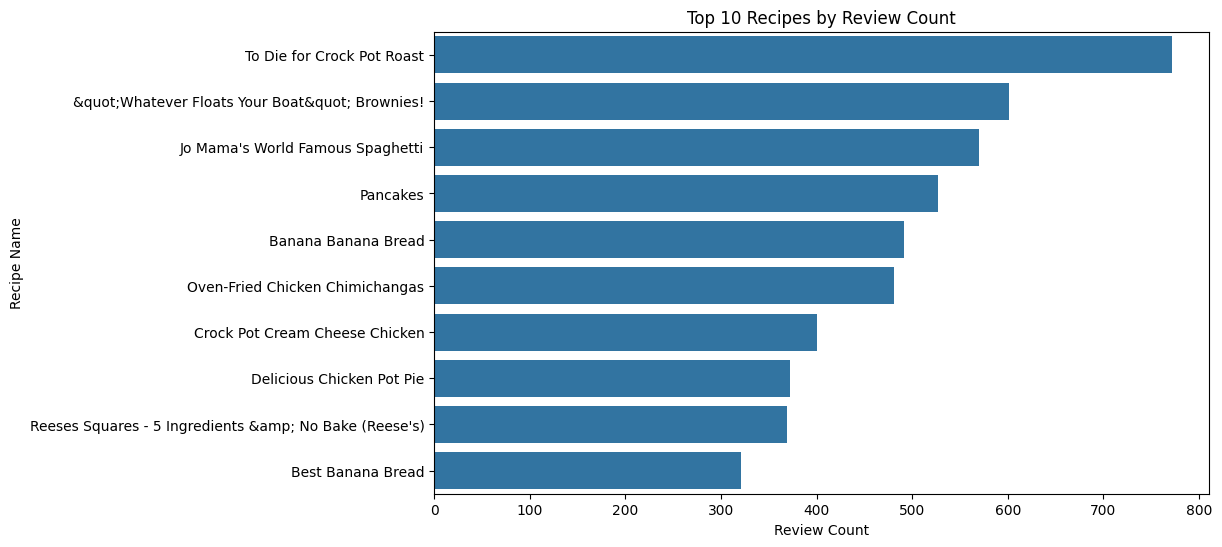

In [6]:
top_recipes = dataframe.groupby('Name').agg({'ReviewId': 'count', 'Rating': 'mean'}).reset_index()
top_recipes.columns = ['Recipe Name', 'Review Count', 'Average Rating']

top_10_recipes = top_recipes.nlargest(10, 'Review Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Review Count', y='Recipe Name', data=top_10_recipes)
plt.title('Top 10 Recipes by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Recipe Name')
plt.show()


Top 10 Authors by Review Count

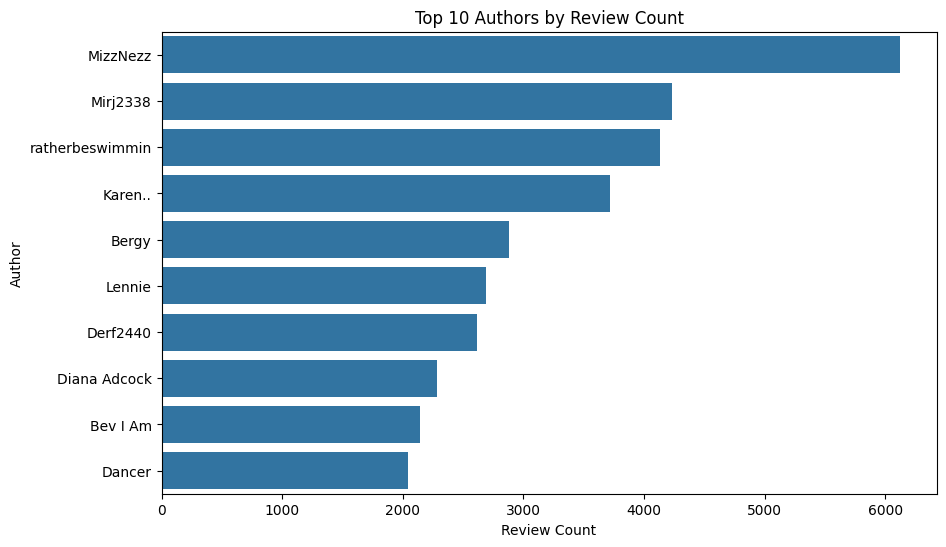

In [7]:
top_authors = dataframe.groupby('AuthorName').agg({'ReviewCount': 'count'}).reset_index()
top_authors.columns = ['Author', 'Review Count']

top_10_authors = top_authors.nlargest(10, 'Review Count')

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Count', y='Author', data=top_10_authors)
plt.title('Top 10 Authors by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Author')
plt.show()